In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dsjobs.csv")

In [4]:
df.head()

,Unnamed: 0,title,company,location,salary,summary
0,0,Data Scientist,Canexia Health Inc.,"Vancouver, BC•Remote","$53,348 - $129,295 a year",Education: You hold a Master’s degree in bioin...
1,1,ML Engineer (Remote Only),Translucent Computing,"Quebec City, QC•Remote",NaN,Orchestrate access of data from code or raw da...
2,2,Data / Imaging Scientist,Tailored Management,"Mississauga, ON•Temporarily Remote",$56 - $66 an hour,Product development experience with a focus on...
3,3,Deep Learning / Data Science Inter,Zighra (Techstars company),"Ottawa, ON•Remote",$35 an hour,Zighra transforms mobile sensor data into huma...
4,4,Data Science Inter,LeapGrad Corp.,"Toronto, ON•Temporarily Remote",NaN,"Ability to data extract, transform, and load p..."


In [6]:
df.columns

Index(['Unnamed: 0', 'title', 'company', 'location', 'salary', 'summary'], dtype='object')

<AxesSubplot:xlabel='company'>

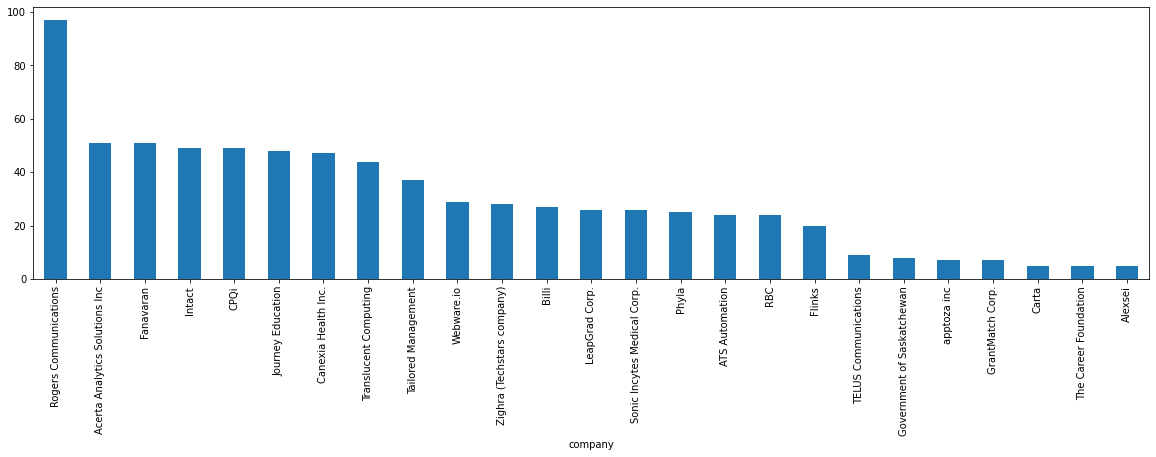

In [12]:
# find companies with highest number of job listings
counts = df.groupby("company").count()["title"].sort_values(ascending=False)[:25]
counts.plot(kind="bar", figsize=(20,5))

# so the companies with the highest number of job listings in data science field is Rogers.
# this tells us where we should be applying considering which companies have more opportunities. 

In [15]:
# find locations with highest number of job listings
counts = df.groupby("location").count()["title"].sort_values(ascending=False)[:25]
counts

#surpsiringly, Brampton has the higher number of job listings in this field. 
#However, there are some duplicate values, so we will clean this data. 


location
Brampton, ON•Temporarily Remote       97
Toronto, ON•Temporarily Remote        86
Kitchener, ON                         51
Mississauga, ON•Remote                51
Vancouver, BC+2 locations             49
Canada•Remote                         48
Vancouver, BC•Remote                  47
Halifax, NS+1 location•Remote         47
Quebec City, QC•Remote                44
Mississauga, ON•Temporarily Remote    37
Ottawa, ON•Remote                     28
Victoria, BC•Remote                   27
Montréal, QC•Remote                   27
Vancouver, BC•Temporarily Remote      26
Cambridge, ON•Temporarily Remote      24
Montréal, QC                          20
Toronto, ON•Remote                    15
Ontario•Temporarily Remote             9
Regina, SK                             8
Toronto, ON                            5
Waterloo, ON                           5
North York, ON                         4
North Vancouver, BC                    4
Winnipeg, MB•Remote                    4
Toronto

In [21]:
def format_location(loc):
    location = loc
    if "remote" in loc.lower():
        split = loc.split("•")
        location = split[0]
        return location
    if "+" in loc.lower():
        split2 = loc.split("+")
        location = split2[0]
        return location
    else:
        return loc

In [22]:
df["Location"] = df["location"].apply(format_location)

In [23]:
df.columns


Index(['Unnamed: 0', 'title', 'company', 'location', 'salary', 'summary',
       'Location'],
      dtype='object')

In [26]:
df.drop(columns=['location'])

,Unnamed: 0,title,company,salary,summary,Location
0,0,Data Scientist,Canexia Health Inc.,"$53,348 - $129,295 a year",Education: You hold a Master’s degree in bioin...,"Vancouver, BC"
1,1,ML Engineer (Remote Only),Translucent Computing,NaN,Orchestrate access of data from code or raw da...,"Quebec City, QC"
2,2,Data / Imaging Scientist,Tailored Management,$56 - $66 an hour,Product development experience with a focus on...,"Mississauga, ON"
3,3,Deep Learning / Data Science Inter,Zighra (Techstars company),$35 an hour,Zighra transforms mobile sensor data into huma...,"Ottawa, ON"
4,4,Data Science Inter,LeapGrad Corp.,NaN,"Ability to data extract, transform, and load p...","Toronto, ON"
...,...,...,...,...,...,...
769,769,Data Scientist,Billi,"$80,000 - $100,000 a year","Demonstrated statistical, machine learning, an...","Victoria, BC"
770,770,Data Science and Analytics - New Grad Leadersh...,Rogers Communications,NaN,Passionate about analytical and statistical mo...,"Brampton, ON"
771,771,Data Analyst,Sonic Incytes Medical Corp.,"$60,000 - $90,000 a year",Technical expertise & knowledge in data mining...,"Vancouver, BC"
772,772,Data Science Instructor,Journey Education,"$10,000 - $15,000 a month",As a data science instructor you will be respo...,Canada


In [27]:
counts = df.groupby("Location").count()["title"].sort_values(ascending=False)[:25]
counts

#So, the highest number of data science related jobs are in the west cost, specifically in Vancouver. 


Location
Vancouver, BC             122
Toronto, ON               108
Brampton, ON               97
Mississauga, ON            90
Kitchener, ON              51
Canada                     48
Halifax, NS+1 location     47
Montréal, QC               47
Quebec City, QC            44
Ottawa, ON                 28
Victoria, BC               27
Cambridge, ON              24
Ontario                     9
Regina, SK                  8
Waterloo, ON                5
North Vancouver, BC         4
North York, ON              4
Winnipeg, MB                4
Dorval, QC                  2
Chalk River, ON             2
Oshawa, ON                  1
Etobicoke, ON               1
Edmonton, AB                1
Name: title, dtype: int64

In [41]:
def format_salary(sal):
    dollar = sal.split('$')
    sal = dollar[1]
    if "a year" in sal:
        split = sal.split("a year")
        annual = float(sal[0])
        return annual
    elif "a month" in sal:
        split2 = sal.split("a month")
        monthly = float(sal[0])
        return monthly * 12
    elif "an hour" in sal:
        split3 = sal.split("an hour")
        hourly = float(sal[0])
        return hourly * 40 * 48
    elif "NaN" in sal:
        return -1
    else:
        return sal

In [45]:
df_cat = df[["Location", "salary"]]

graph for Location: total = 23


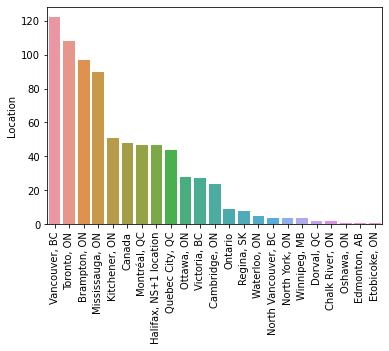

graph for salary: total = 19


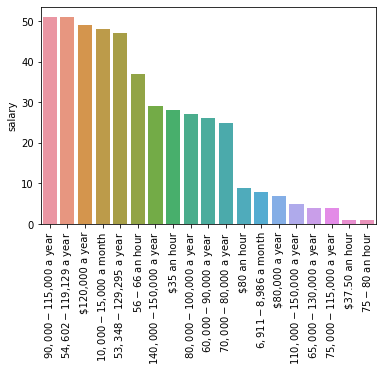

In [47]:
# we will now graph categorically

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [53]:
conda install -c conda-forge wordcloud

Solving environment: done

## Package Plan ##

  environment location: /Users/nehapadala/opt/anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38h50d1736_1         3.1 MB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    wordcloud-1.8.1            |   py38h96a0964_1         170 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/osx-64::python_abi-3.8-2_cp38
  wordcloud          conda-forge/osx-64::wordcloud-1.8.1-py38h96a0964_1

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.3-py38hecd8cb5_0 --> conda-forge::conda-4.10.3-py38h50d1736_1



wordcloud-1.

In [54]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


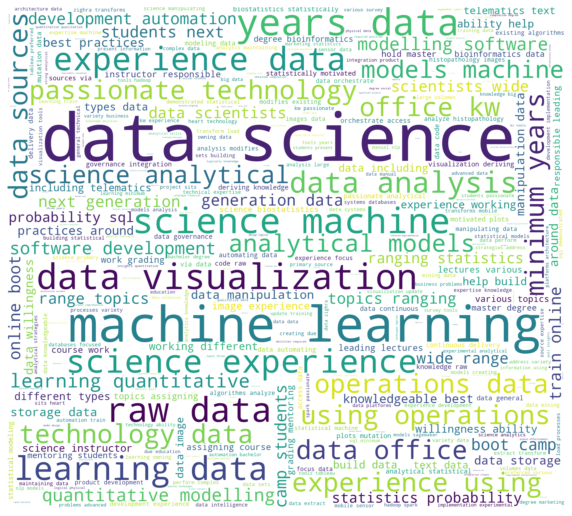

In [58]:
# Trying to see which words are the most used in summaries. Through this visualization,
# we will learn which skills are the most wanted.

words = " ".join(df["summary"])
def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    words_tokens = word_tokenize(text)
    for w in words_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([i for i in words_filtered])
wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words = 1500, width = 2000, height=1800)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()